___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = pd.read_csv("Mall_Customers.csv", index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.rename(columns={'Annual Income (k$)':'annual_income(k$)','Spending Score (1-100)':'spending_score(1-100)'
                  ,'Gender':'gender',"Age":"age"},inplace=True)

In [5]:
df.head()

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### skorlari düsük olanlar az alışveriş yapanlar, yüksek olanlar çok alışveriş yapan müsteriler

## ? birisi tek bir alışveriş yapınca mı skor hesaplanıyor yoksa alışverişin miktarını baz alarak mı hesaplanıyor bilmiyoruz.

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 200 non-null    object
 1   age                    200 non-null    int64 
 2   annual_income(k$)      200 non-null    int64 
 3   spending_score(1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

gender                   0
age                      0
annual_income(k$)        0
spending_score(1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score(1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


## age[18-70]
## yıllık 137k'lık maaşı olanın spending_score'u ne acaba ? buna bakabiliriz.
## annual_income(k) sütunuda outlier olabilir düşük ihtimal çünkü std< mean

In [11]:
df.nunique()

gender                    2
age                      51
annual_income(k$)        64
spending_score(1-100)    84
dtype: int64

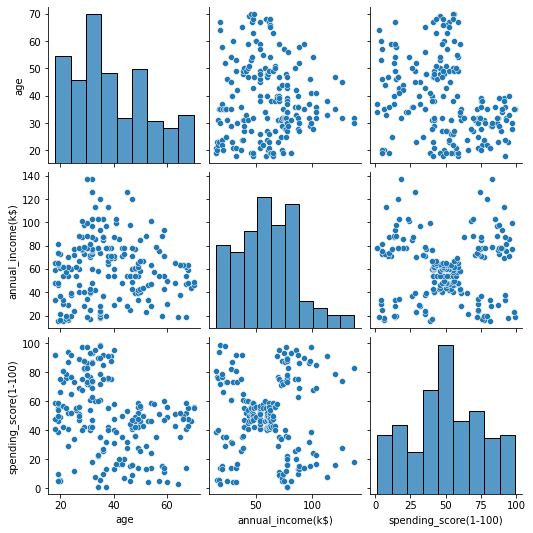

In [12]:
sns.pairplot(df);

## pairplota bakarak kabataslak kaç clustera ayırırız bunu gözlemleyebiliriz;mesela yıllık gelir ile harcama skorunun dağılımına bakarak 5 cluster'a ayırabiliriz.

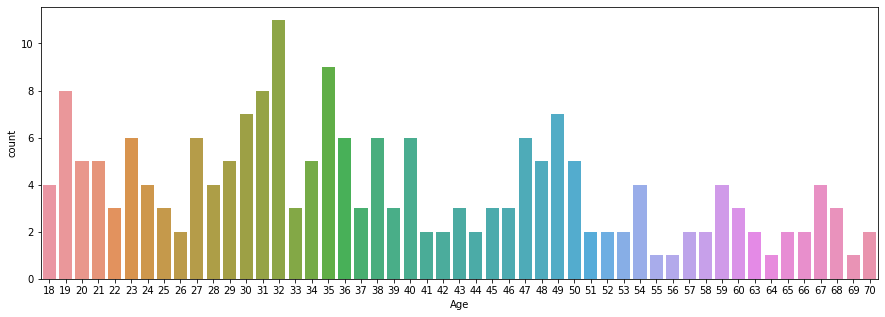

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x ='age', data = df)
plt.xlabel('Age')
plt.show();

## 51 yaş sonrasının alışveriş yapması için çalışmalar olabilir ya da kartı alması için 27-40 yaş arasındakiler daha çok alışveriş yapanlar onlara özel kampanyalar vs yapılabilir.

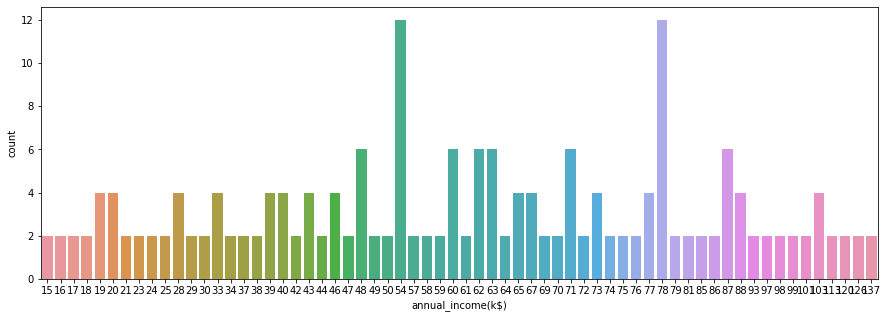

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='annual_income(k$)', data=df)
plt.xlabel('annual_income(k$)')
plt.show();

## düşük gelirliler ve çok yüksek gelirliler alışverişte düşük genelde orta gelirliler alışveriş yapmış bu mağazadan

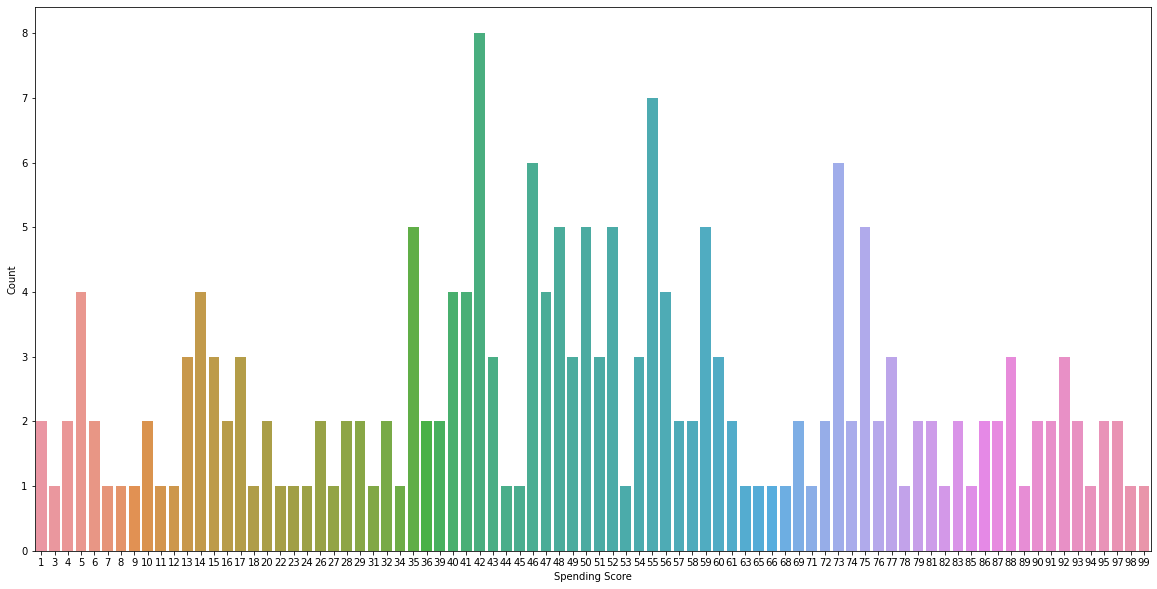

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='spending_score(1-100)', data=df)
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show();

In [16]:
df["gender"].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [17]:
df["gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: gender, dtype: float64

<AxesSubplot:>

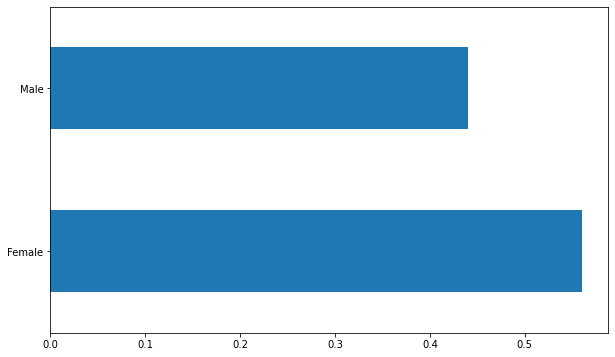

In [18]:
df["gender"].value_counts(normalize=True).plot(kind='barh')

### kadın müşteriler bir tık çoğunlukta ürünleri ve kampanyaları buna göre belirleyebiliriz ------> makyaj malzemeleri vs.

In [19]:
df.groupby("gender")["spending_score(1-100)"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


In [20]:
df.groupby("gender")["annual_income(k$)"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


In [21]:
df.loc[(df["spending_score(1-100)"] > 70  ) & (df["annual_income(k$)"] > 70)]

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
128,Male,40,71,95
130,Male,38,71,75
132,Male,39,71,75
134,Female,31,72,71
136,Female,29,73,88
138,Male,32,73,73
140,Female,35,74,72
142,Male,32,75,93
144,Female,32,76,87


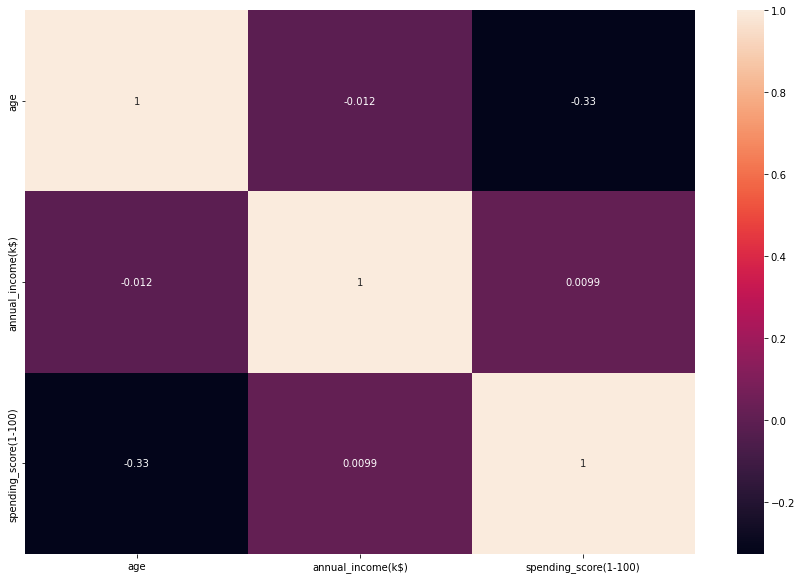

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## kazanç ile skorlar arasında korelasyon yok; N.Ş.A'da gelir arttıkça harcamanın daha çok olmasını bekleriz.gelir arttıkça insanlar bizim markete uğramıyorlar demek ki diyebiliriz.

## pairplotta 5 cluster'a ayırmayı düşünmüştük ona yakından bakalım.

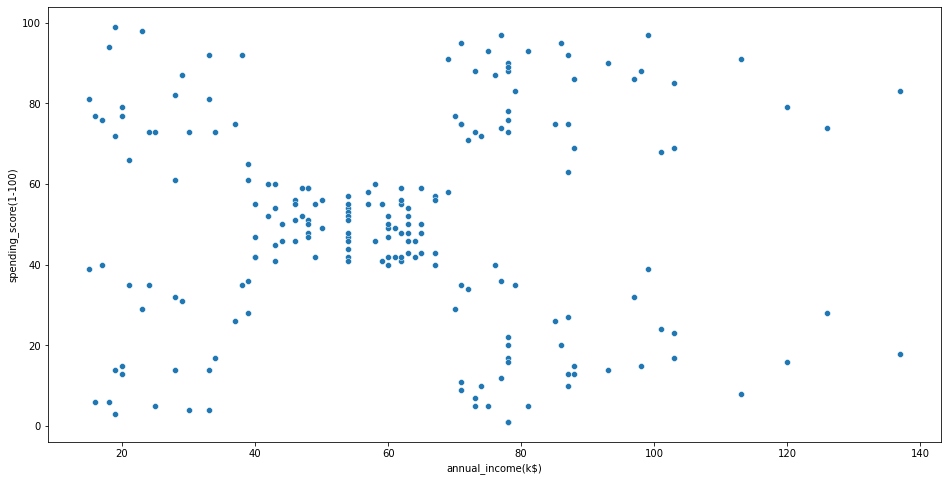

In [23]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ="annual_income(k$)", y="spending_score(1-100)", data=df)
plt.show()

In [24]:
df["gender"]  = df["gender"].map({"Female":1,"Male":0})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 200 non-null    int64
 1   age                    200 non-null    int64
 2   annual_income(k$)      200 non-null    int64
 3   spending_score(1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 15.9 KB


In [26]:
df.head()

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


<AxesSubplot:xlabel='gender', ylabel='spending_score(1-100)'>

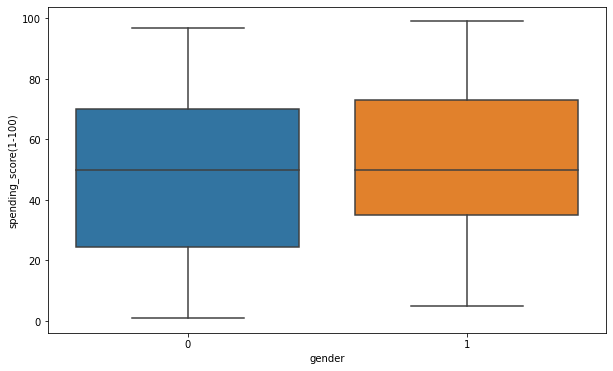

In [27]:
sns.boxplot(x='gender', y='spending_score(1-100)', data=df)

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## K-MEANS algoritması distance tabanlıdır ve scalinge ihtiyacı vardır ; ayrıca outlierlara karşı da duyarlıdır.

## gender hariç diğer sütunlar 1-100 arası vs değişiyor scale ile sonuç ve scale'siz sonuç karşılaştırılabilir.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
df_scaled = scaler.fit_transform(df)

In [31]:
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head()

,gender,age,annual_income(k$),spending_score(1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


## ideal clustering -------> küme içi mesafe olabildiğince az (intra) ; kümeler arası mesafe ise olabildiğince max. olmalı (inter) 

## hopkins

              clustering tendency:
kümeleme eğilimi: -----> hopkins testi, eğer veriler kümeleme eğilimi içermiyorsa, o zaman herhangi bir kümeleme algoritması tarafından tanımlanan kümeler alakasız olabilir : 0'a yakınsa kümelemeye yatkındır 0.3'Ü geçtikçe hopkins data clusteringe uygun değil uniform bir yapıda deriz.

#### Data kumeleme islemi icin uygun mu? -------------------> hopkins

In [32]:
#!pip install pyclustertend

In [33]:
X

,gender,age,annual_income(k$),spending_score(1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,1.0,0.326923,0.860656,0.795918
196,1.0,0.519231,0.909836,0.275510
197,0.0,0.269231,0.909836,0.744898
198,0.0,0.269231,1.000000,0.173469


In [34]:
from pyclustertend import hopkins

In [35]:
hopkins(X, X.shape[0])

0.20480553764393333

## 1. age-spending_score'a göre clustering

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

## neden ? tüm veriyle yapmıyoruz sonradan feature selaction yapıyorduk.

#### *ii. Determine optimal number of clusters*

In [36]:
X

,gender,age,annual_income(k$),spending_score(1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,1.0,0.326923,0.860656,0.795918
196,1.0,0.519231,0.909836,0.275510
197,0.0,0.269231,0.909836,0.744898
198,0.0,0.269231,1.000000,0.173469


In [37]:
X_1   = X.iloc[:,1::2]
X_1

,age,spending_score(1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959
...,...,...
195,0.326923,0.795918
196,0.519231,0.275510
197,0.269231,0.744898
198,0.269231,0.173469


In [38]:
hopkins(X_1, X_1.shape[0])              # KÜMELEME EĞİLİMİMİZE NE OLDU ?  

0.30541301996126025

In [39]:
from sklearn.cluster import KMeans

In [40]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence, and is
 |      theoretically proven to be :math:`\mathcal{O}(\log k)`-optimal.
 |      See the description of `n_init` for mor

### n_clusters : Kac küme oluşsun? (Default=8)

###  n_init       : Bu parametre ile random olarak verilen sayida baslangic noktasi belirlenir. Hangisi en iyi kumelemeyi sagliyorsa algoritma onunla devam eder.n_init = 10 ----------------------> 10 kere bu centroid atamasını yapıyor


### init = kmeans ++ ---------------------> tamamen random değil daha çabuk sonuca ulaşmak için akıllı bir seçim yaparak k'ları atıyor.


### max_iter : İterasyon sayısını manuel olarak ayarlamamızı sağlar (Default=300). Çok büyük datalarda 300 yetersiz kalır. Bu durumlarda k-means algoritmasi uyarı verir.

## vanilla

In [41]:
K_means_model = KMeans(random_state=42)

In [42]:
K_means_model.fit_predict(X_1)  

array([6, 1, 2, 1, 6, 1, 7, 5, 4, 1, 4, 5, 4, 1, 7, 1, 7, 1, 0, 5, 7, 1,
       7, 1, 4, 5, 0, 1, 7, 1, 4, 1, 4, 1, 4, 1, 7, 1, 7, 1, 3, 5, 0, 1,
       0, 1, 0, 6, 6, 6, 0, 1, 6, 3, 0, 0, 0, 3, 6, 0, 3, 6, 3, 0, 3, 6,
       0, 3, 6, 6, 3, 0, 3, 3, 3, 6, 0, 0, 6, 0, 3, 0, 3, 0, 6, 0, 3, 6,
       1, 0, 3, 6, 0, 0, 6, 6, 0, 6, 0, 6, 6, 0, 3, 6, 0, 6, 3, 0, 3, 3,
       3, 6, 0, 6, 6, 6, 3, 0, 0, 0, 6, 0, 0, 5, 6, 1, 0, 5, 4, 5, 7, 5,
       6, 1, 2, 5, 7, 1, 2, 1, 4, 5, 6, 5, 2, 5, 0, 1, 7, 5, 7, 5, 7, 5,
       7, 5, 7, 1, 7, 1, 0, 5, 2, 5, 0, 5, 7, 5, 7, 1, 7, 1, 7, 5, 4, 5,
       4, 1, 4, 5, 7, 5, 7, 5, 0, 5, 4, 1, 7, 5, 7, 1, 7, 5, 7, 5, 7, 1,
       7, 5])

In [43]:
X_1["Clusters"] = K_means_model.labels_

In [44]:
X_1

,age,spending_score(1-100),Clusters
0,0.019231,0.387755,6
1,0.057692,0.816327,1
2,0.038462,0.051020,2
3,0.096154,0.775510,1
4,0.250000,0.397959,6
...,...,...,...
195,0.326923,0.795918,5
196,0.519231,0.275510,7
197,0.269231,0.744898,1
198,0.269231,0.173469,7


## buradaki kümeleme kalitesine  bakalım 

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
silhouette_score(X_1, K_means_model.labels_)              # n_cluster = 8 iken aslında yüksek bir skor verdi bakalım 

0.8633648726106997

## !!! Etiketlememizi düşürmeliyiz ki elbow'u sıkıntısız kullanalım.

In [47]:
X_1

,age,spending_score(1-100),Clusters
0,0.019231,0.387755,6
1,0.057692,0.816327,1
2,0.038462,0.051020,2
3,0.096154,0.775510,1
4,0.250000,0.397959,6
...,...,...,...
195,0.326923,0.795918,5
196,0.519231,0.275510,7
197,0.269231,0.744898,1
198,0.269231,0.173469,7


In [48]:
X_1.drop("Clusters",axis=1,inplace=True)

In [49]:
X_1

,age,spending_score(1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959
...,...,...
195,0.326923,0.795918
196,0.519231,0.275510
197,0.269231,0.744898
198,0.269231,0.173469


## Choosing The Optimal Number of Clusters

## ELBOW

In [50]:
kmeans = KMeans() 

In [51]:
ssd = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_1)
    ssd.append(kmeans.inertia_)

## inertia nedir ?  Oluşturulan her küme için küme elemanlarının merkeze olan uzaklıklarını ölcer ve bunlarin karesini alır. Çıkan değerleri toplar ve ortalamasını alır. Kümelerden hesaplanan değerler ne kadar kücükse, küme elemanları merkeze o kadar yakın demektir. Inertia değeri yuksek çıkarsa küme elemanları genis alana yayılmış demektir.

# SSE = SSD = SSR = Distortion Score

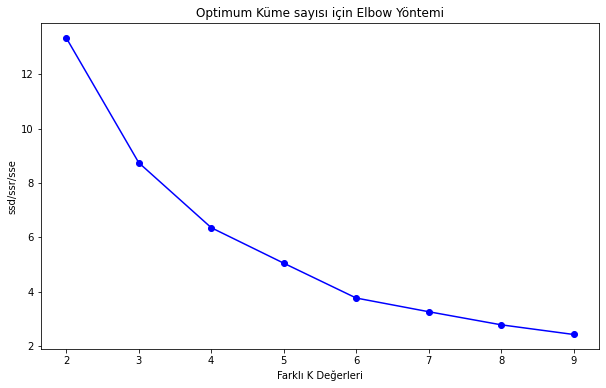

In [52]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Farklı K Değerleri")
plt.ylabel("ssd/ssr/sse")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

## gözlem birimi kadar cluster olsa zaten hatam 0 olur her bir gözlem birimi merkez olur bundan dolayı küme sayısı arttıkça zaten hatanın düşmesini bekleriz.

# k'ya 9 verirsem en düşük hatayı alırım ama amacımız : minimum cluster ile maximum ayrımı yapmak.keskin düşüşün bittiği yer bizim için optimum k .(elbow)

In [53]:
ssd

[13.337690580804235,
 8.742042168276535,
 6.350049379567737,
 5.043112983474712,
 3.7594620668773757,
 3.25569934208888,
 2.7733038814938045,
 2.4173854632073697]

In [54]:
pd.Series(ssd).diff()   # düşüşler

0         NaN
1   -4.595648
2   -2.391993
3   -1.306936
4   -1.283651
5   -0.503763
6   -0.482395
7   -0.355918
dtype: float64

In [55]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,4.595648
3,2.391993
4,1.306936
5,1.283651
6,0.503763
7,0.482395
8,0.355918


<AxesSubplot:>

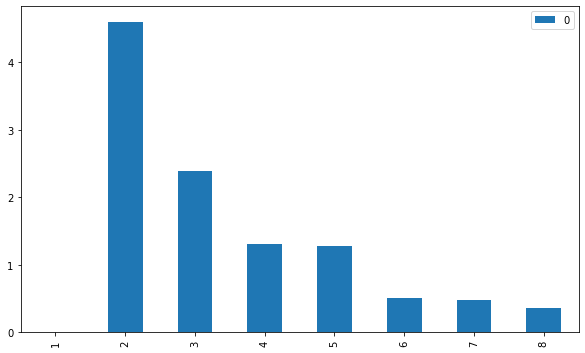

In [56]:
df_diff.plot(kind='bar')

## 3 veya 4 seçilebilir gibi yellowbrick'e de bakalım bi  :

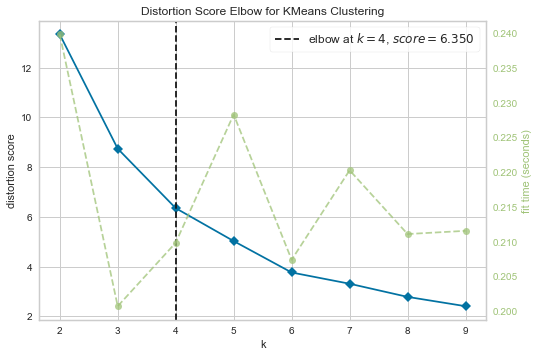

In [57]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X_1)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

## yellowbric  4 dedi. 3 ile 4 arasında kararsız kalırsak :

## k değerlerine göre silhouette_score hesaplaması yapabiliriz.

## Silhouette analysis : Inertia, her küme içindeki verilerin merkez etrafında ne kadar sıkı kümelendiğinin skorunu ölcüyordu. Silhouette ise kümelerin hem kendi içlerinde ne kadar sıkı bir sekilde kümelendiğini hem de diger kümeye ne kadar uzak oldugunu ölcer. Bu yüzden clustering quality(kümelememizin kalitesini)  ölçmek icin bu metodu kullanacagiz ,
##  Silhouette score  1' e ne kadar yakınsa kümeleme o kadar iyi demektir.

In [58]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.42882713071959183
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.45615225386265235
For n_clusters=7, the silhouette score is 0.40578335793980236
For n_clusters=8, the silhouette score is 0.4169908111029726
For n_clusters=9, the silhouette score is 0.4343827451704745


## n_cluster = 3 için sonuçlarım daha iyi olduğundan ona göre yeniden clustering işlemimi uyarlayacağım : 

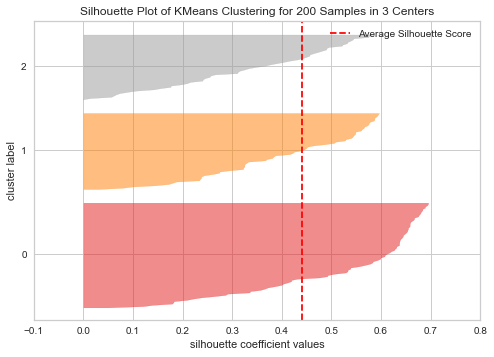

In [59]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)                     # 3'e karar verdik inceleyelim şimdi.
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_1)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters 

In [60]:
model_1 = KMeans(n_clusters =3, random_state=42)
model_1.fit_predict(X_1)

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [61]:
model_1.labels_     

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [62]:
clusters = model_1.labels_
clusters

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [63]:
X_1.head()

,age,spending_score(1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


In [64]:
X_1["predicted_clusters"] = clusters
X_1

,age,spending_score(1-100),predicted_clusters
0,0.019231,0.387755,2
1,0.057692,0.816327,0
2,0.038462,0.051020,2
3,0.096154,0.775510,0
4,0.250000,0.397959,2
...,...,...,...
195,0.326923,0.795918,0
196,0.519231,0.275510,2
197,0.269231,0.744898,0
198,0.269231,0.173469,2


### Visualizing and Labeling All the Clusters

<AxesSubplot:xlabel='age', ylabel='spending_score(1-100)'>

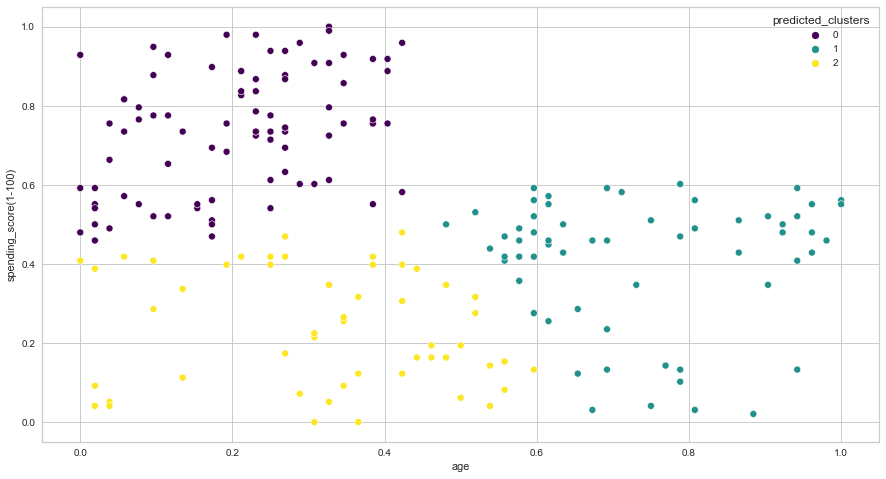

In [65]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='spending_score(1-100)', hue='predicted_clusters', data=X_1, palette="viridis")

## centroidleri de görmek istersek:

In [66]:
model_1.cluster_centers_

array([[0.20565611, 0.73961585],
       [0.7323201 , 0.40108624],
       [0.32656023, 0.23912206]])

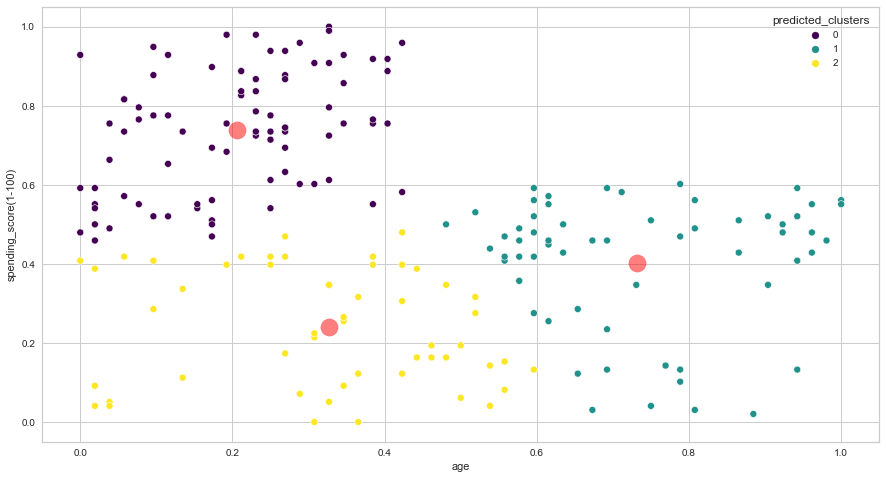

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='spending_score(1-100)', hue='predicted_clusters', data=X_1, palette="viridis")
centers = model_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5);

### spending_scoru yüksek olan yaşı büyük insan yok ! genç olanlar para harcamya daha yatkın 

In [68]:
silhouette_score(X_1, model_1.labels_)                

0.7722918351360397

## kümeleme kalitem neden düştü ? 

### Why silhouette_score is negative?

![image.png](attachment:image.png)

### https://stackoverflow.com/questions/63639841/how-can-silhouette-scores-be-negative

### Clustering based on Annual Income and Spending Score

In [69]:
X

,gender,age,annual_income(k$),spending_score(1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,1.0,0.326923,0.860656,0.795918
196,1.0,0.519231,0.909836,0.275510
197,0.0,0.269231,0.909836,0.744898
198,0.0,0.269231,1.000000,0.173469


In [70]:
X_2   = X.iloc[:,2:]
X_2

,annual_income(k$),spending_score(1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [71]:
hopkins(X_2, X_2.shape[0])              # KÜMELEME EĞİLİMİMİZE NE OLDU ?  

0.3109988994577218

In [72]:
from sklearn.cluster import KMeans

## vanilla

In [73]:
K_means_model = KMeans(random_state=42)

In [74]:
K_means_model.fit_predict(X_2)  

array([4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7, 4, 7, 4, 0, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 3, 6, 1, 6, 3, 6, 3, 6,
       1, 6, 3, 6, 3, 6, 3, 6, 3, 6, 1, 6, 3, 6, 1, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 6, 1, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2])

In [75]:
X_2["Clusters"] = K_means_model.labels_

In [76]:
X_2

,annual_income(k$),spending_score(1-100),Clusters
0,0.000000,0.387755,4
1,0.000000,0.816327,7
2,0.008197,0.051020,4
3,0.008197,0.775510,7
4,0.016393,0.397959,4
...,...,...,...
195,0.860656,0.795918,2
196,0.909836,0.275510,5
197,0.909836,0.744898,2
198,1.000000,0.173469,5


## buradaki kümeleme kalitesine  bakalım 

In [77]:
from sklearn.metrics import silhouette_score

In [78]:
silhouette_score(X_2, K_means_model.labels_)              # n_cluster = 8 iken aslında yüksek bir skor verdi bakalım 

0.8784006365204918

## !!! Etiketlememizi düşürmeliyiz ki elbow'u sıkıntısız kullanalım.

In [79]:
X_2

,annual_income(k$),spending_score(1-100),Clusters
0,0.000000,0.387755,4
1,0.000000,0.816327,7
2,0.008197,0.051020,4
3,0.008197,0.775510,7
4,0.016393,0.397959,4
...,...,...,...
195,0.860656,0.795918,2
196,0.909836,0.275510,5
197,0.909836,0.744898,2
198,1.000000,0.173469,5


In [80]:
X_2.drop("Clusters",axis=1,inplace=True)

In [81]:
X_2

,annual_income(k$),spending_score(1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


## Choosing The Optimal Number of Clusters

## ELBOW

In [82]:
kmeans = KMeans() 

In [83]:
ssd = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_2)
    ssd.append(kmeans.inertia_)

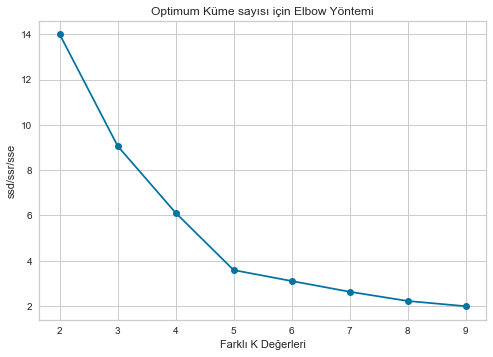

In [84]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Farklı K Değerleri")
plt.ylabel("ssd/ssr/sse")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

In [85]:
ssd

[13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.583117905952561,
 3.1003435707513756,
 2.6260623772655105,
 2.218840260984672,
 1.9873627947617072]

In [86]:
pd.Series(ssd).diff()   # düşüşler

0         NaN
1   -4.934520
2   -2.948673
3   -2.527194
4   -0.482774
5   -0.474281
6   -0.407222
7   -0.231477
dtype: float64

In [87]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,4.934520
3,2.948673
4,2.527194
5,0.482774
6,0.474281
7,0.407222
8,0.231477


<AxesSubplot:>

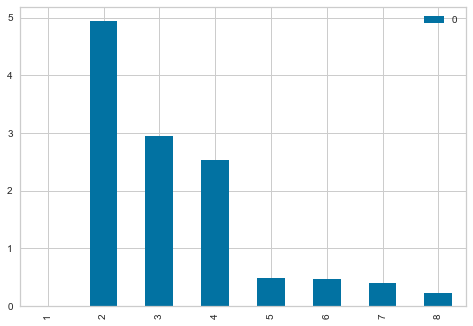

In [88]:
df_diff.plot(kind='bar')

## 5 seçilebilir gibi yellowbrick'e de bakalım bi  :

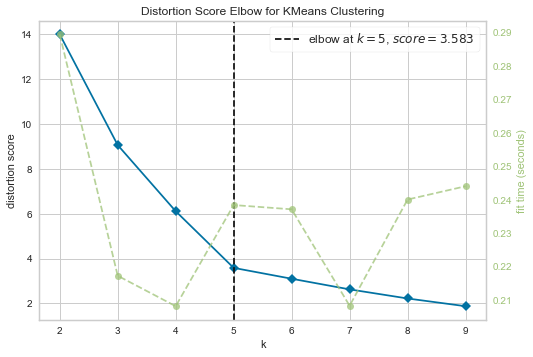

In [89]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X_2)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

## yellowbrick de  5 dedi. 3 ile 5 arasında kararsız kalırsak :

## k değerlerine göre silhouette_score hesaplaması yapabiliriz.

In [90]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33340205479521
For n_clusters=3, the silhouette score is 0.4514909309424474
For n_clusters=4, the silhouette score is 0.49620078745146784
For n_clusters=5, the silhouette score is 0.5594854531227246
For n_clusters=6, the silhouette score is 0.5377658512956012
For n_clusters=7, the silhouette score is 0.5187916611768829
For n_clusters=8, the silhouette score is 0.43038461857643606
For n_clusters=9, the silhouette score is 0.4435209006412269


## n_cluster = 5 için sonuçlarım daha iyi olduğundan ona göre yeniden clustering işlemimi uyarlayacağım : 

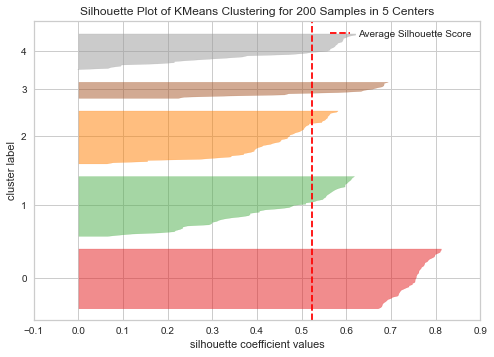

In [91]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)                     # 5'e karar verdik inceleyelim şimdi.
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_1)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters 

In [92]:
model_2 = KMeans(n_clusters =5, random_state=42)
model_2.fit_predict(X_2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [93]:
model_2.labels_     

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [94]:
clusters = model_2.labels_
clusters

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [95]:
X_2.head()

,annual_income(k$),spending_score(1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [96]:
X_2["predicted_clusters2"] = clusters
X_2

,annual_income(k$),spending_score(1-100),predicted_clusters2
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2
...,...,...,...
195,0.860656,0.795918,4
196,0.909836,0.275510,1
197,0.909836,0.744898,4
198,1.000000,0.173469,1


### Visualizing and Labeling All the Clusters

<AxesSubplot:xlabel='annual_income(k$)', ylabel='spending_score(1-100)'>

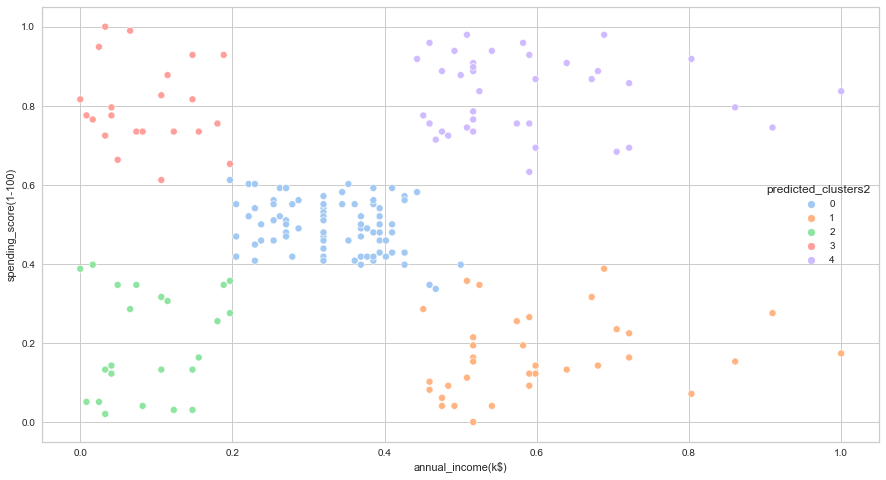

In [97]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='annual_income(k$)', y='spending_score(1-100)', hue='predicted_clusters2', data=X_2, palette="pastel")

## centroidleri de görmek istersek:

In [98]:
model_2.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

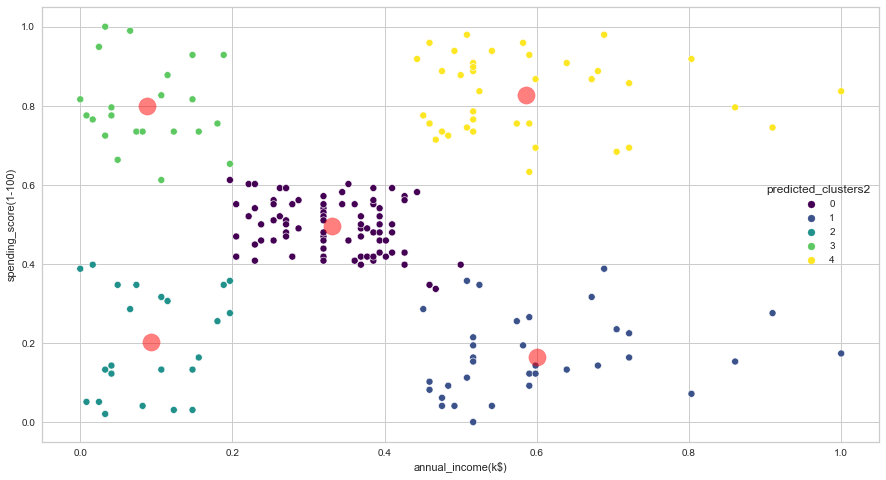

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='annual_income(k$)', y='spending_score(1-100)', hue='predicted_clusters2', data=X_2, palette="viridis")
centers = model_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5);

### 0---------> yıllık kazanç : ortalama  ,    harcama : ortalama                 : normaller

### 1---------> yıllık kazanç : ortalama üstü  ,    harcama : ortalama altı   : paraya değer verenler (varyemezler)

### 2---------> yıllık kazanç : ortalama  altı  ,    harcama : ortalama altı  : mecburen az harcama yapanlar

### 3---------> yıllık kazanç : ortalama  altı  ,    harcama : ortalama üstü : yarını düşünmeyenler (sadık müşteri) 

### 4---------> yıllık kazanç : ortalama  üstü ,    harcama : ortalama üstü : hayatı yaşayanlar

## bunu zaten pairplotta da görmüştük !!!!!!!!! mesela burada yıllık geliri çok olanlara karşı alışveriş yapmalarına yönelik kampanyalar vs yapılabilir.

## 1 clusterdakilerin yaşlarına bakarak neden harcamadıklarına vs bir çıkarım yapılabilir belki yaşı küçüktür evli değildir gibi .

In [100]:
silhouette_score(X_2, model_2.labels_)     

0.8526273365666693

# Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [102]:
dendrogram()

TypeError: dendrogram() missing 1 required positional argument: 'Z'

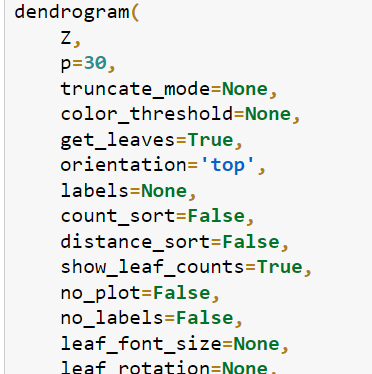

### Z -----> linkage'dır.
### linkeage ------------>  bir datanin hangi cluster' a gidecegini belirler.

linkage()
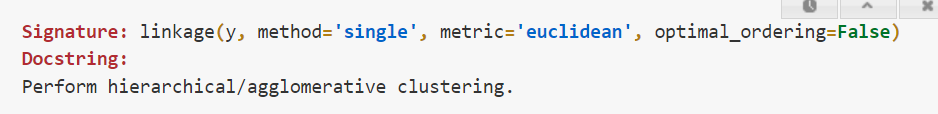

## y--------------> data.
##  method = "   "
    -ward     : Datayı hangi cluster' a eklediginde varyans en az olacaksa datayı ona ekler.
    -single   : Cluster' ların en yakın elemanına olan uzaklıklarıno ölçer; en yakın olan cluster' a atama islemini yapar.
    -average  : Cluster' ların merkezlerine olan uzaklığına bakarak distance'ı en küçük olana atar.
    -complete : Cluster'ların en uzak noktasını bulur.Bu en uzak noktalardan en yakını hangisi ise datayı o cluster'a atar.

## dendrogram'ın parametrelerine tekrar dönersek : 
### p: Dendogramdaki görüntü karışıklığını önlemek için leaf sayısını belirleme
### truncate_mode :(Default=None) Eğer bir p değeri giriyorsak bunu da default değer yerine 'lastp' olarak degistirmemiz gerekir. (Sondaki belirttigim kadar sayida p' yi göster)

### Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___